In [1]:
import numpy as np
from numpy.ma import masked_values as maval
import gsw
import xarray as xr
import pandas as pd
import os.path as op
from datetime import datetime, timedelta
from scipy.interpolate import PchipInterpolator as pchip
from scipy.signal import medfilt
import dask.array as dsar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as ocean
from matplotlib import cm
import matplotlib.colors as clr
import matplotlib.ticker as tick
import matplotlib.path as mpath
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
comdir = '/swot/SUM02/takaya/SOCCOM/SIO'
limdir = '/swot/SUM03/Argo_BGC_backscatter_SO_merged'

In [3]:
pf = pd.read_csv(op.join(comdir,'../Fronts/pf.txt'), delim_whitespace=True, 
                 nrows=968, header=None, dtype=float, names=['lon','lat'])
saf = pd.read_csv(op.join(comdir,'../Fronts/saf.txt'), delim_whitespace=True, 
                 nrows=1079, header=None, dtype=float, names=['lon','lat'])

In [9]:
comC = pd.read_csv(op.join(comdir,'SOCCOM_Cs.csv'),
                  infer_datetime_format=True, keep_date_col=True, parse_dates=['time']).drop(columns=['Unnamed: 0'])
comR = pd.read_csv(op.join(comdir,'SOCCOM_rates.csv'),
                   infer_datetime_format=True, keep_date_col=True, parse_dates=['time']).drop(columns=['Unnamed: 0'])
limC = pd.read_csv(op.join(comdir,'../../SOCLIM/SOCLIM-sanspEu_Cs.csv'),
                   infer_datetime_format=True, keep_date_col=True, parse_dates=['time']).drop(columns=['Unnamed: 0'])
limR = pd.read_csv(op.join(comdir,'../../SOCLIM/SOCLIM-sanspEu_rates.csv'),
                   infer_datetime_format=True, keep_date_col=True, parse_dates=['time']).drop(columns=['Unnamed: 0'])

In [10]:
dC_COMCLIM = comC
dC_COMCLIM = pd.concat([dC_COMCLIM,limC],
                      ignore_index=True, sort=False)
dr_COMCLIM = comR
dr_COMCLIM = pd.concat([dr_COMCLIM,limR],
                      ignore_index=True, sort=False)

In [64]:
dC_mon = pd.DataFrame(data={'time':dC_COMCLIM.loc[dC_COMCLIM.Lat<0.].sort_values('time').time.astype('datetime64[M]').dropna()}
                     ).reset_index()

In [12]:
l = 0
m = 0
n = 0
ddeg = 0.
for i in range(len(dC_COMCLIM.time)):
    if np.isnan(dC_COMCLIM.Lon[i]):
        pass
    else:
        j = np.argmin(np.abs(pf.lon-dC_COMCLIM.Lon[i]))
        k = np.argmin(np.abs(saf.lon-dC_COMCLIM.Lon[i]))
        d = {'time':[dC_COMCLIM.time[i]],
            'Lat':[dC_COMCLIM.Lat[i]], 'Lon':[dC_COMCLIM.Lon[i]], 
            'CH':[dC_COMCLIM.CH_rolled[i]]}

        if dC_COMCLIM.Lat[i]>=pf.lat[j]-ddeg and dC_COMCLIM.Lat[i]<=saf.lat[k]+ddeg:        
            if l == 0:
                accC = pd.DataFrame(data=d, index=[0])
            else:
                accC = pd.concat([accC,pd.DataFrame(data=d)], ignore_index=True)
            l += 1
        elif dC_COMCLIM.Lat[i]<pf.lat[j]-ddeg:
            if m == 0:
                saccC = pd.DataFrame(data=d, index=[0])
            else:
                saccC = pd.concat([saccC,pd.DataFrame(data=d)], ignore_index=True)
            m += 1
        elif dC_COMCLIM.Lat[i]>saf.lat[k]+ddeg:
            if n == 0:
                naccC = pd.DataFrame(data=d, index=[0])
            else:
                naccC = pd.concat([naccC,pd.DataFrame(data=d)], ignore_index=True)
            n += 1

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


In [67]:
l = 0
m = 0
n = 0
ddeg = 0.
for i in range(len(dC_COMCLIM.time)):
    if np.isnan(dC_COMCLIM.Lon[i]):
        pass
    else:
        j = np.argmin(np.abs(pf.lon-dC_COMCLIM.Lon[i]))
        k = np.argmin(np.abs(saf.lon-dC_COMCLIM.Lon[i]))
        d = {'time':[dC_COMCLIM.time[i]],
            'Lat':[dC_COMCLIM.Lat[i]], 'Lon':[dC_COMCLIM.Lon[i]], 
            'CH':[dC_COMCLIM.CH_rolled[i]]}
        
        if dC_COMCLIM.Lat[i]>=-60 and dC_COMCLIM.Lat[i]<=-45:        
            if l == 0:
                C56 = pd.DataFrame(data=d, index=[0])
            else:
                C56 = pd.concat([C56,pd.DataFrame(data=d)], ignore_index=True)
            l += 1
        elif dC_COMCLIM.Lat[i]<-60:
            if m == 0:
                C6 = pd.DataFrame(data=d, index=[0])
            else:
                C6 = pd.concat([C6,pd.DataFrame(data=d)], ignore_index=True)
            m += 1
        elif dC_COMCLIM.Lat[i]>-45:
            if n == 0:
                C5 = pd.DataFrame(data=d, index=[0])
            else:
                C5 = pd.concat([C5,pd.DataFrame(data=d)], ignore_index=True)
            n += 1

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


In [68]:
l = 0
m = 0
n = 0
for i in range(len(dr_COMCLIM.time)):
    if np.isnan(dr_COMCLIM.Lon[i]):
        pass
    else:
        j = np.argmin(np.abs(pf.lon-dr_COMCLIM.Lon[i]))
        k = np.argmin(np.abs(saf.lon-dr_COMCLIM.Lon[i]))
#         print(j,k)
        d = {'time':[dr_COMCLIM.time[i]],
            'Lat':[dr_COMCLIM.Lat[i]], 'Lon':[dr_COMCLIM.Lon[i]], 
            'r':[dr_COMCLIM.rPH[i]]}
        if dr_COMCLIM.Lat[i]>=-60. and dr_COMCLIM.Lat[i]<=-45.:
            if l == 0:
                r56 = pd.DataFrame(data=d, index=[0])
            else:
                r56 = pd.concat([r56,pd.DataFrame(data=d)], ignore_index=True)
            l += 1
        elif dr_COMCLIM.Lat[i]<-60:
            if m == 0:
                r6 = pd.DataFrame(data=d, index=[0])
            else:
                r6 = pd.concat([r6,pd.DataFrame(data=d)], ignore_index=True)
            m += 1
        elif dr_COMCLIM.Lat[i]>-45:
            if n == 0:
                r5 = pd.DataFrame(data=d, index=[0])
            else:
                r5 = pd.concat([r5,pd.DataFrame(data=d)], ignore_index=True)
            n += 1

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


In [69]:
nordC = naccC.where(naccC.CH.notna()).dropna(thresh=3)
C_5 = C5.where(C5.CH.notna()).dropna(thresh=3)
r_5 = r5.where(r5.r.notna()).dropna(thresh=3)

midC = accC.where(accC.CH.notna()).dropna(thresh=3)
C5_6 = C56.where(C56.CH.notna()).dropna(thresh=3)
r5_6 = r56.where(r56.r.notna()).dropna(thresh=3)

sudC = saccC.where(saccC.CH.notna()).dropna(thresh=3)
C6_ = C6.where(C6.CH.notna()).dropna(thresh=3)
r6_ = r6.where(r6.r.notna()).dropna(thresh=3)


nordC = nordC.sort_values('time').set_index('time')
C_5 = C_5.sort_values('time').set_index('time')
r_5 = r_5.sort_values('time').set_index('time')
midC = midC.sort_values('time').set_index('time')
C5_6 = C5_6.sort_values('time').set_index('time')
r5_6 = r5_6.sort_values('time').set_index('time')
sudC = sudC.sort_values('time').set_index('time')
C6_ = C6_.sort_values('time').set_index('time')
r6_ = r6_.sort_values('time').set_index('time')

In [70]:
nordC_m = nordC.resample('M').median()
C_5m = C_5.resample('M').median()
r_5m = r_5.resample('M').median()

midC_m = midC.resample('M').median()
C5_6m = C5_6.resample('M').median()
r5_6m = r5_6.resample('M').median()

sudC_m = sudC.resample('M').median()
C6_m = C6_.resample('M').median()
r6_m = r6_.resample('M').median()

In [71]:
grouped = dC_mon.groupby('time')
i = 0
for group in grouped:
    if i == 0:
        totdata = np.array([len(group[1])])
    else:
        totdata = np.append(totdata, np.array([len(group[1])]))
    i += 1
totdata

array([ 32,  62,  60,  62,  61,  57,  58,  57, 108, 129, 123, 140, 138,
       138, 132, 138, 135, 132, 135, 132, 138, 150, 148, 163, 209, 278,
       327, 333, 333, 323, 434, 564, 569, 678, 609, 625, 600, 587, 548,
       556, 551, 546, 579, 527, 537, 570, 572, 626, 608, 609, 557, 579,
       564, 538, 564, 548, 591, 633, 582, 629, 558, 140])

In [72]:
nordC_mon = pd.DataFrame(data={'time':nordC.loc[nordC.Lat<0.].reset_index().time.astype('datetime64[M]')})
grouped = nordC_mon.groupby('time')
i = 0
for group in grouped:
    if i == 0:
        nordata = np.array([len(group[1])])
    else:
        nordata = np.append(nordata, np.array([len(group[1])]))
    i += 1
nordata

array([ 13,  39,  42,  44,  43,  42,  43,  42,  74,  96,  86,  99,  99,
       103,  99, 101,  91,  98, 103,  96,  68,  69,  72,  68, 117, 158,
       177, 198, 174, 159, 162, 174, 193, 204, 191, 215, 236, 248, 210,
       222, 245, 232, 248, 219, 228, 244, 254, 280, 276, 287, 271, 281,
       282, 275, 283, 244, 266, 264, 238, 262, 201,  35])

In [73]:
midC_mon = pd.DataFrame(data={'time':midC.loc[midC.Lat<0.].reset_index().time.astype('datetime64[M]')})
grouped = midC_mon.groupby('time')
i = 0
for group in grouped:
    if i == 0:
        midata = np.array([len(group[1])])
    else:
        midata = np.append(midata, np.array([len(group[1])]))
    i += 1
midata

array([  4,   3,   2,   3,  11,   2,   2,   4,   5,   5,   5,   1,  13,
         7,   5,   9,  11,  15,   7,  10,   8,  23,  52,  63,  58,  96,
       101,  83,  69,  76,  89, 124, 115, 126, 160, 164, 132, 150, 149,
       135, 111, 101,  79,  66,  48,  81,  83, 103, 104,  85, 104, 120,
       103,  92,  93,  92, 131,  23])

In [74]:
sudC_mon = pd.DataFrame(data={'time':sudC.loc[sudC.Lat<0.].reset_index().time.astype('datetime64[M]')})
grouped = sudC_mon.groupby('time')
i = 0
for group in grouped:
    if i == 0:
        sudata = np.array([len(group[1])])
    else:
        sudata = np.append(sudata, np.array([len(group[1])]))
    i += 1
sudata

array([ 15,  20,  18,  16,  15,  15,  15,  15,  23,  31,  35,  37,  34,
        30,  28,  33,  28,  27,  27,  27,  35,  35,  40,  54,  54,  60,
        65,  61,  61,  57, 164, 305, 307, 398, 329, 286, 249, 213, 177,
       164, 168, 162, 182, 173, 198, 225, 239, 280, 284, 241, 202, 189,
       172, 175, 174, 181, 220, 275, 250, 274, 223,  81])

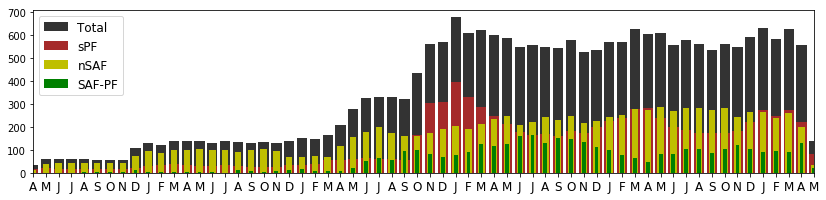

In [76]:
months = np.append(np.append(np.array(['A','M','J','J','A','S','O','N','D']), 
                            np.tile(np.array(['J','F','M','A','M','J','J','A','S','O','N','D']),4)),
                  np.array(['J','F','M','A','M']))


fig, ax = plt.subplots(figsize=(14,3))
ax.bar(range(len(totdata)), totdata, color='k', alpha=.8, label=r'Total')
ax.bar(range(len(sudata)), sudata, color='brown', width=0.8, label=r'sPF')
ax.bar(range(len(nordata)), nordata, color='y', width=0.5, label=r'nSAF')
ax.bar(range(4,len(midata)+4), midata, color='g', width=0.3, label=r'SAF-PF')

ax.set_xticks(np.arange(len(totdata)))
ax.set_xticklabels(months, fontsize=12)
ax.set_xlim([0,len(totdata)-1])
ax.legend(loc='upper left', fontsize=12)

In [24]:
grouped = dC_mon.time.groupby(dC_mon.time.dt.month)

i = 0
for group in grouped:
    if i == 0:
        totdata_m = np.array([len(group[1])])
    else:
        totdata_m = np.append(totdata_m, np.array([len(group[1])]))
    i += 1

In [25]:
topo = xr.open_dataset('/home/rdussin/etopo5.nc')
lon = topo.topo_lon.data
lon[lon<0] += 360
topo = xr.DataArray(topo.topo.data, dims=['lat','lon'],
                   coords={'lat':topo.topo_lat.data,'lon':lon})
topoSO = topo.isel(lat=slice(0,800))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/groupby.py:749: FutureWarning: Default reduction dimension will be changed to the grouped dimension after xarray 0.12. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  allow_lazy=True, **kwargs)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


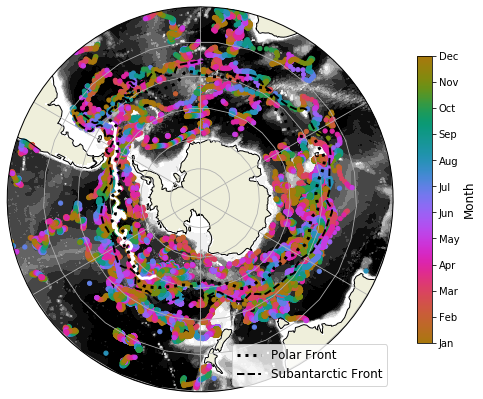

In [26]:
ds = xr.open_dataset(op.join(comdir,'5904185_Mprof.nc'))
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = plt.figure(figsize=(7,6))
fig.set_tight_layout(True)
ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

cs = ax.contourf(topoSO.lon, topoSO.lat, topoSO.where(topoSO<0.), cmap='binary_r',
               levels=np.linspace(-5000,-200,10), extend='both',
               transform=ccrs.PlateCarree())
for c in cs.collections:
    c.set_rasterized(True)
im = ax.scatter(comC.Lon.values, comC.Lat.values, 
               s=18., c=comC.time.dt.month, cmap=ocean.cm.phase,
               vmin=1, vmax=12, alpha=1.,
               transform=ccrs.PlateCarree(), rasterized=True)
ax.scatter(limC.Lon.values, limC.Lat.values, 
          s=18., c=limC.time.dt.month, cmap=ocean.cm.phase,
          vmin=1, vmax=12, alpha=1.,
          transform=ccrs.PlateCarree(), rasterized=True)
ax.plot(ds.groupby('JULD').mean().LONGITUDE.values, ds.groupby('JULD').mean().LATITUDE.values, 
        c='w', lw=3,
        transform=ccrs.PlateCarree())
ax.plot(pf.lon, pf.lat, 'k:', lw=3, transform=ccrs.PlateCarree(), label=r"Polar Front")
ax.plot(saf.lon, saf.lat, 'k--', lw=2, transform=ccrs.PlateCarree(), label=r"Subantarctic Front")
ax.coastlines()
ax.gridlines()
ax.legend(loc='lower right', fontsize=12)

cbar = fig.colorbar(im, ax=ax, shrink=.7, ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
cbar.set_ticklabels(np.roll(np.asarray(['Jan','Feb','Mar','Apr','May','Jun',
                                        'Jul','Aug','Sep','Oct','Nov','Dec']), -0))
cbar.set_label(r"Month", fontsize=12)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


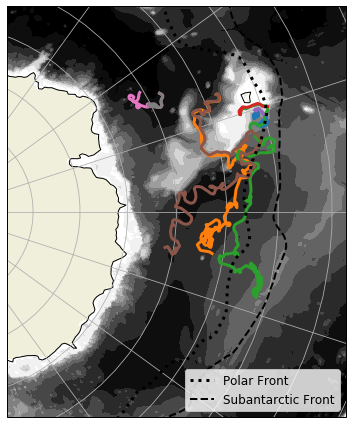

In [27]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = plt.figure(figsize=(7,6))
fig.set_tight_layout(True)
ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo(central_longitude=0.0))
ax.set_extent([60, 120, -80, -40], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)

cs = ax.contourf(topoSO.lon, topoSO.lat, topoSO.where(topoSO<0.), cmap='binary_r',
               levels=np.linspace(-5000,-200,10), extend='both',
               transform=ccrs.PlateCarree())
for c in cs.collections:
    c.set_rasterized(True)
for i in limC.floatID.unique():
    ax.plot(limC.where(limC.floatID==i).Lon.values, limC.where(limC.floatID==i).Lat.values, 
           transform=ccrs.PlateCarree(), rasterized=True, lw=3)

ax.plot(pf.lon, pf.lat, 'k:', lw=3, transform=ccrs.PlateCarree(), label=r"Polar Front")
ax.plot(saf.lon, saf.lat, 'k--', lw=2, transform=ccrs.PlateCarree(), label=r"Subantarctic Front")
ax.coastlines()
ax.gridlines()
ax.legend(loc='lower right', fontsize=12)

In [28]:
xbins = np.arange(-180,190,10)
ybins = np.arange(-80,-20,10)
nDATA = xr.DataArray(np.zeros_like(ybins)[:,np.newaxis]*xbins, dims=['lat','lon'],
                     coords={'lat':ybins,'lon':xbins})

for i in range(len(dC_COMCLIM.CH_rolled)):
    if ~np.isnan(dC_COMCLIM.CH_rolled[i]) and ~np.isnan(dC_COMCLIM.Lat[i]) and ~np.isnan(dC_COMCLIM.Lon[i]):
        ix = np.nanargmin(np.abs(xbins-dC_COMCLIM.Lon.data[i]))
        iy = np.nanargmin(np.abs(ybins-dC_COMCLIM.Lat.data[i]))
        if dC_COMCLIM.Lon.data[i]<xbins[ix]:
            if dC_COMCLIM.Lat.data[i]<ybins[iy]:
                nDATA[iy-1,ix-1] += 1
            else:
                nDATA[iy,ix-1] += 1
        else:
            if dC_COMCLIM.Lat.data[i]<ybins[iy]:
                nDATA[iy-1,ix] += 1
            else:
                nDATA[iy,ix] += 1

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Series.data is deprecated and will be removed in a future version
  
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.data is deprecated and will be removed in a future version
  if __name__ == '__main__':
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Series.data is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Series.data is deprecated and will be removed in a future version
  app.launch_new_instance()
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Series.data is deprecated and will be removed in a future version
  # This is added back 

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


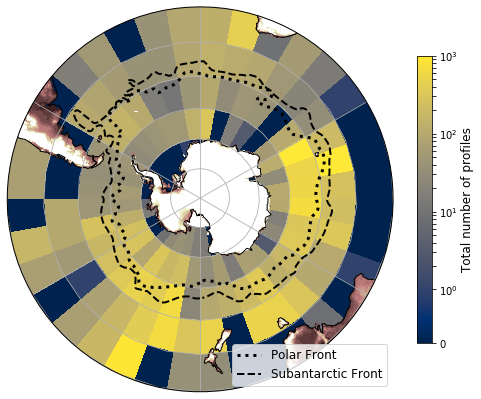

In [29]:
fig = plt.figure(figsize=(7,6))
fig.set_tight_layout(True)
ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

im = ax.pcolormesh(nDATA.lon, nDATA.lat, nDATA, 
                  rasterized=True, norm=clr.SymLogNorm(linthresh=1, vmin=0, vmax=1000),
                  cmap='cividis', transform=ccrs.PlateCarree())
cs = ax.contourf(topoSO.lon, topoSO.lat, topoSO.where(topoSO>0.), cmap='pink',
               levels=np.linspace(0,1000,20), extend='both',
               transform=ccrs.PlateCarree())
for c in cs.collections:
    c.set_rasterized(True)
ax.plot(pf.lon, pf.lat, 'k:', lw=3, transform=ccrs.PlateCarree(), label=r"Polar Front")
ax.plot(saf.lon, saf.lat, 'k--', lw=2, transform=ccrs.PlateCarree(), label=r"Subantarctic Front")
ax.coastlines()
ax.gridlines()
ax.legend(loc='lower right', fontsize=12)

cbar = fig.colorbar(im, ax=ax, shrink=.7)
cbar.set_label(r"Total number of profiles", fontsize=12)

In [82]:
C_5m_25 = C_5.resample('M').quantile(q=.25)
C_5m_75 = C_5.resample('M').quantile(q=.75)
C_56m_25 = C5_6.resample('M').quantile(q=.25)
C_56m_75 = C5_6.resample('M').quantile(q=.75)
C_6m_25 = C6_.resample('M').quantile(q=.25)
C_6m_75 = C6_.resample('M').quantile(q=.75)

r_5m_25 = r_5.resample('M').quantile(q=.25)
r_5m_75 = r_5.resample('M').quantile(q=.75)
r_56m_25 = r5_6.resample('M').quantile(q=.25)
r_56m_75 = r5_6.resample('M').quantile(q=.75)
r_6m_25 = r6_.resample('M').quantile(q=.25)
r_6m_75 = r6_.resample('M').quantile(q=.75)

In [83]:
Cphyto_n = np.append(np.append(np.array([np.nan]),C_5m.CH.data),np.ones(7)*np.nan).reshape((6,12))
Cphyto_m = np.append(np.append(np.ones(3)*np.nan,C5_6m.CH.data),np.ones(7)*np.nan).reshape((6,12))
Cphyto_s = np.append(np.append(np.ones(3)*np.nan,C6_m.CH.data),np.ones(7)*np.nan).reshape((6,12))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.data is deprecated and will be removed in a future version
  
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.data is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


No handles with labels found to put in legend.


Text(0, 0.5, '$r_P$ [d$^{-1}$]')

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


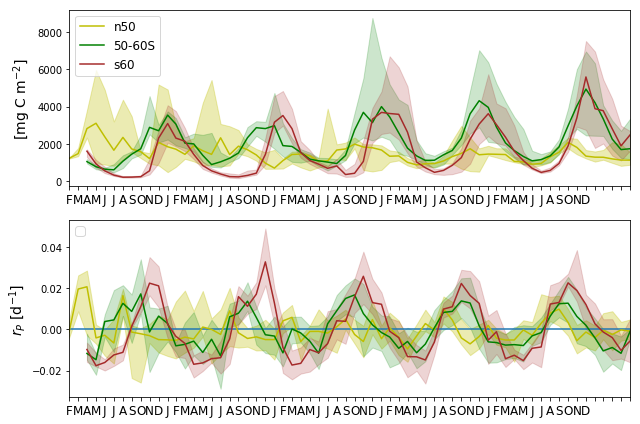

In [84]:
months = np.append(np.array(['F','M','A','M','J','J','A','S','O','N','D']), 
                   np.tile(np.array(['J','F','M','A','M','J','J','A','S','O','N','D']),4))
fig, (ax1,ax4) = plt.subplots(nrows=2,ncols=1,figsize=(9,6))
fig.set_tight_layout(True)

ax1.plot(C_5m.reset_index().time, C_5m.CH, c='y', label=r"n50")
ax1.fill_between(C_5m.reset_index().time, C_5m_75.CH, C_5m_25.CH, color='y', alpha=.3)
ax1.plot(C5_6m.reset_index().time, C5_6m.CH, c='g', label=r"50-60S")
ax1.fill_between(C5_6m.reset_index().time, C_56m_75.CH, C_56m_25.CH, color='g', alpha=.2)
ax1.plot(C6_m.reset_index().time, C6_m.CH, c='brown', label=r"s60")
ax1.fill_between(C6_m.reset_index().time, C_6m_75.CH, C_6m_25.CH, color='brown', alpha=.2)

ax4.plot(r_5m.reset_index().time, np.zeros_like(r_5m.r))
ax4.plot(r_5m.reset_index().time, r_5m.r*86400, c='y', label=r"")
ax4.fill_between(r_5m.reset_index().time, r_5m_75.r*86400, r_5m_25.r*86400, color='y', alpha=.3)
ax4.plot(r5_6m.reset_index().time, r5_6m.r*86400, c='g', label=r"")
ax4.fill_between(r5_6m.reset_index().time, r_56m_75.r*86400, r_56m_25.r*86400, color='g', alpha=.2)
ax4.plot(r6_m.reset_index().time, r6_m.r*86400, c='brown', label=r"")
ax4.fill_between(r6_m.reset_index().time, r_6m_75.r*86400, r_6m_25.r*86400, color='brown', alpha=.2)
ax1.set_xlim([C_5m.index[0],C_5m.index[-1]])
ax4.set_xlim([C_5m.index[0],C_5m.index[-1]])
ax1.set_xticks(C_5m.index)
ax4.set_xticks(C_5m.index)

ax1.set_xticklabels(months, fontsize=12)
ax1.legend(loc='upper left', fontsize=12)
ax4.set_xticklabels(months, fontsize=12)
ax4.legend(loc='upper left', fontsize=12)
ax1.set_ylabel(r'[mg C m$^{-2}$]', fontsize=14)
ax4.set_ylabel(r'$r_P$ [d$^{-1}$]', fontsize=14)

In [86]:
test = C_5.reset_index()
Cp_5m = xr.DataArray(np.ones(36)*np.nan,dims=['day'],coords={'day':range(36)})
Cp_5m25 = Cp_5m.copy()
Cp_5m75 = Cp_5m.copy()
dinm = [31,28,31,30,31,30,31,31,30,31,30,31]

k = 0
for i in range(12):
    for j in range(3):
        if j == 0:
            Cp_5m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day<10)].CH.median()
            Cp_5m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<10)].CH.quantile(q=.25)
            Cp_5m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<10)].CH.quantile(q=.75)
        elif j == 1:
            Cp_5m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day>=10) &
                                (pd.DatetimeIndex(test['time']).day<20)].CH.median()
            Cp_5m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=10) &
                                  (pd.DatetimeIndex(test['time']).day<20)].CH.quantile(q=.25)
            Cp_5m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) &
                                  (pd.DatetimeIndex(test['time']).day>=10) &
                                  (pd.DatetimeIndex(test['time']).day<20)].CH.quantile(q=.75)
        else:
            Cp_5m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day>=20)].CH.median()
            Cp_5m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=20)].CH.quantile(q=.25)
            Cp_5m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=20)].CH.quantile(q=.75)
            
        k += 1
Cp_5m

<xarray.DataArray (day: 36)>
array([1420.154701, 1448.949355, 1494.845663, 1422.100556, 1318.874046,
       1289.2242  , 1357.935268, 1375.380988, 1440.827266, 1426.703106,
       1191.31538 , 1115.379395, 1069.891728, 1042.229136, 1026.035205,
       1017.259317,  939.030481,  931.252261,  966.070998, 1006.299628,
       1023.373526, 1142.147497, 1282.701275, 1471.06004 , 1531.984159,
       1641.495774, 1798.945699, 1771.092664, 1756.814369, 1799.835951,
       1755.67398 , 1586.081146, 1489.089236, 1516.522786, 1432.503095,
       1403.961946])
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 ... 26 27 28 29 30 31 32 33 34 35

In [87]:
test = r_5.reset_index()
rp_5m = xr.DataArray(np.ones(36)*np.nan,dims=['day'],coords={'day':range(36)})
rp_5m25 = rp_5m.copy()
rp_5m75 = rp_5m.copy()
dinm = [31,28,31,30,31,30,31,31,30,31,30,31]

k = 0
for i in range(12):
    for j in range(3):
        if j == 0:
            rp_5m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day<10)].r.median()
            rp_5m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<10)].r.quantile(q=.25)
            rp_5m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<10)].r.quantile(q=.75)
        elif j == 1:
            rp_5m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day<20) &
                                (pd.DatetimeIndex(test['time']).day>=10)].r.median()
            rp_5m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<20) &
                                  (pd.DatetimeIndex(test['time']).day>=10)].r.quantile(q=.25)
            rp_5m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<20) &
                                  (pd.DatetimeIndex(test['time']).day>=10)].r.quantile(q=.75)
        else:
            rp_5m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day>=20)].r.median()
            rp_5m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=20)].r.quantile(q=.25)
            rp_5m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=20)].r.quantile(q=.75)
        k += 1

In [88]:
test = C5_6.reset_index()
Cp5_6m = xr.DataArray(np.ones(36)*np.nan,dims=['day'],coords={'day':range(36)})
Cp5_6m25 = Cp5_6m.copy()
Cp5_6m75 = Cp5_6m.copy()
dinm = [31,28,31,30,31,30,31,31,30,31,30,31]

k = 0
for i in range(12):
    for j in range(3):
        if j == 0:
            Cp5_6m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                 (pd.DatetimeIndex(test['time']).day<10)].CH.median()
            Cp5_6m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                   (pd.DatetimeIndex(test['time']).day<10)].CH.quantile(q=.25)
            Cp5_6m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                   (pd.DatetimeIndex(test['time']).day<10)].CH.quantile(q=.75)
        elif j == 1:
            Cp5_6m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                 (pd.DatetimeIndex(test['time']).day<20) &
                                 (pd.DatetimeIndex(test['time']).day>=10)].CH.median()
            Cp5_6m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                   (pd.DatetimeIndex(test['time']).day<20) &
                                 (pd.DatetimeIndex(test['time']).day>=10)].CH.quantile(q=.25)
            Cp5_6m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                   (pd.DatetimeIndex(test['time']).day<20) &
                                 (pd.DatetimeIndex(test['time']).day>=10)].CH.quantile(q=.75)
        else:
            Cp5_6m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                 (pd.DatetimeIndex(test['time']).day>=20)].CH.median()
            Cp5_6m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                   (pd.DatetimeIndex(test['time']).day>=20)].CH.quantile(q=.25)
            Cp5_6m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                   (pd.DatetimeIndex(test['time']).day>=20)].CH.quantile(q=.75)
        k += 1
Cp5_6m

<xarray.DataArray (day: 36)>
array([3879.866051, 4222.129274, 3853.408249, 3466.640713, 3167.939512,
       2924.428795, 2675.327452, 2249.614894, 1982.212185, 1789.421132,
       1665.428672, 1612.383827, 1450.37564 , 1325.749561, 1226.301797,
       1123.552917, 1089.078354, 1076.895061, 1054.11424 , 1063.448838,
       1137.696964, 1201.536037, 1272.198214, 1395.323922, 1467.614571,
       1598.143013, 1794.72141 , 2130.244729, 2473.873182, 3122.139951,
       3494.864615, 3867.565254, 3936.63869 , 4235.31765 , 3846.590277,
       3652.768698])
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 ... 26 27 28 29 30 31 32 33 34 35

In [89]:
test = r5_6.reset_index()
rp5_6m = xr.DataArray(np.ones(36)*np.nan,dims=['day'],coords={'day':range(36)})
rp5_6m25 = rp5_6m.copy()
rp5_6m75 = rp5_6m.copy()
dinm = [31,28,31,30,31,30,31,31,30,31,30,31]

k = 0
for i in range(12):
    for j in range(3):
        if j == 0:
            rp5_6m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day<10)].r.median()
            rp5_6m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<10)].r.quantile(q=.25)
            rp5_6m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<10)].r.quantile(q=.75)
        elif j == 1:
            rp5_6m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day<20) & 
                                (pd.DatetimeIndex(test['time']).day>=10)].r.median()
            rp5_6m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<20) & 
                                  (pd.DatetimeIndex(test['time']).day>=10)].r.quantile(q=.25)
            rp5_6m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<20) & 
                                  (pd.DatetimeIndex(test['time']).day>=10)].r.quantile(q=.75)
        else:
            rp5_6m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day>=20)].r.median()
            rp5_6m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=20)].r.quantile(q=.25)
            rp5_6m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=20)].r.quantile(q=.75)
        k += 1

In [90]:
test = C6_.reset_index()
Cp6_m = xr.DataArray(np.ones(36)*np.nan,dims=['day'],coords={'day':range(36)})
Cp6_m25 = Cp6_m.copy()
Cp6_m75 = Cp6_m.copy()
dinm = [31,28,31,30,31,30,31,31,30,31,30,31]

k = 0
for i in range(12):
    for j in range(3):
        if j == 0:
            Cp6_m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day<10)].CH.median()
            Cp6_m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<10)].CH.quantile(q=.25)
            Cp6_m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<10)].CH.quantile(q=.75)
        elif j == 1:
            Cp6_m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day>=10) &
                                (pd.DatetimeIndex(test['time']).day<20)].CH.median()
            Cp6_m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=10) &
                                  (pd.DatetimeIndex(test['time']).day<20)].CH.quantile(q=.25)
            Cp6_m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=10) &
                                  (pd.DatetimeIndex(test['time']).day<20)].CH.quantile(q=.75)
        else:
            Cp6_m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day>=20)].CH.median()
            Cp6_m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=20)].CH.quantile(q=.25)
            Cp6_m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=20)].CH.quantile(q=.75)
        k += 1
Cp6_m

<xarray.DataArray (day: 36)>
array([3805.288195, 3548.932747, 3711.555425, 3785.723013, 3570.603854,
       3294.263881, 3137.117926, 2758.68852 , 2181.23443 , 2154.082813,
       1713.138987, 1507.86548 , 1205.494774, 1110.158159,  866.871096,
        804.886858,  743.519036,  626.876429,  547.480076,  466.824446,
        444.918866,  477.55719 ,  550.139509,  677.480803,  548.76428 ,
        593.849287,  519.305386,  802.279912,  905.522895,  971.195688,
       1207.757548, 1531.719251, 2091.876737, 2226.688491, 2822.091204,
       3782.22794 ])
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 ... 26 27 28 29 30 31 32 33 34 35

In [91]:
test = r6_.reset_index()
rp6_m = xr.DataArray(np.ones(36)*np.nan,dims=['day'],coords={'day':range(36)})
rp6_m25 = rp6_m.copy()
rp6_m75 = rp6_m.copy()
dinm = [31,28,31,30,31,30,31,31,30,31,30,31]

k = 0
for i in range(12):
    for j in range(3):
        if j == 0:
            rp6_m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day<10)].r.median()
            rp6_m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<10)].r.quantile(q=.25)
            rp6_m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day<10)].r.quantile(q=.75)
        elif j == 1:
            rp6_m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day>=10) &
                                (pd.DatetimeIndex(test['time']).day<20)].r.median()
            rp6_m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=10) &
                                  (pd.DatetimeIndex(test['time']).day<20)].r.quantile(q=.25)
            rp6_m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=10) &
                                  (pd.DatetimeIndex(test['time']).day<20)].r.quantile(q=.75)
        else:
            rp6_m[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                (pd.DatetimeIndex(test['time']).day>=20)].r.median()
            rp6_m25[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=20)].r.quantile(q=.25)
            rp6_m75[k] = test.loc[(pd.DatetimeIndex(test['time']).month==i+1) & 
                                  (pd.DatetimeIndex(test['time']).day>=20)].r.quantile(q=.75)
        k += 1
rp6_m

<xarray.DataArray (day: 36)>
array([ 1.145156e-07,  4.013664e-08,  4.785465e-09, -5.805721e-09,
       -1.154899e-08, -4.914711e-08, -7.087522e-08, -5.335138e-08,
       -1.382746e-07, -1.501519e-07, -1.403415e-07, -1.445146e-07,
       -1.427518e-07, -1.680171e-07, -1.868089e-07, -1.540187e-07,
       -1.448139e-07, -1.365673e-07, -1.598447e-07, -1.072452e-07,
       -1.570575e-08,  3.350883e-08,  4.432146e-08,  7.681118e-08,
        8.702031e-08,  1.268146e-07,  1.949031e-07,  1.433306e-07,
        2.413305e-07,  2.391150e-07,  2.080275e-07,  2.512476e-07,
        2.559635e-07,  2.152947e-07,  1.992993e-07,  1.274701e-07])
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 ... 26 27 28 29 30 31 32 33 34 35

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/dataarray.py:2170: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs)


Text(0, 0.5, 'r$_P$ [d$^{-1}$]')

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


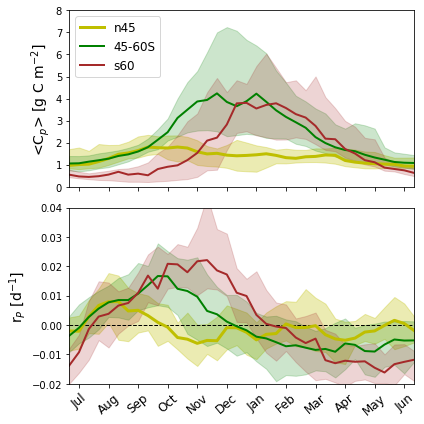

In [92]:
months = np.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
dinm = np.array([31,31,30,31,30,31,31,28,31,30,31,30])
fig, (ax3,ax7) = plt.subplots(nrows=2,ncols=1,figsize=(6,6))
fig.set_tight_layout(True)

    
ax3.plot(range(36), Cp_5m.roll(day=-18).data*1e-3, c='y', lw=3, label=r"n45")
ax3.plot(range(36), Cp5_6m.roll(day=-18).data*1e-3, c='g', lw=2, label=r"45-60S")
ax3.plot(range(36), Cp6_m.roll(day=-18).data*1e-3, c='brown', lw=2, label=r"s60")
ax7.plot(np.zeros(36), 'k--', lw=1)
ax7.plot(range(36), rp_5m.roll(day=-18)*86400, c='y', lw=3, label=r"n45")
ax7.plot(range(36), rp5_6m.roll(day=-18)*86400, c='g', lw=2, label=r"45-60S")
ax7.plot(range(36), rp6_m.roll(day=-18)*86400, c='brown', lw=2, label=r"s60")


ax3.fill_between(range(36), Cp_5m25.roll(day=-18)*1e-3, 
                 Cp_5m75.roll(day=-18)*1e-3, color='y', alpha=.3)
ax3.fill_between(range(36), Cp5_6m25.roll(day=-18)*1e-3, 
                 Cp5_6m75.roll(day=-18)*1e-3, color='g', alpha=.2)
ax3.fill_between(range(36), Cp6_m25.roll(day=-18)*1e-3, 
                 Cp6_m75.roll(day=-18)*1e-3, color='brown', alpha=.2)
ax7.fill_between(range(36), rp_5m25.roll(day=-18)*86400, 
                 rp_5m75.roll(day=-18)*86400, color='y', alpha=.3)
ax7.fill_between(range(36), rp5_6m25.roll(day=-18)*86400, 
                 rp5_6m75.roll(day=-18)*86400, color='g', alpha=.2)
ax7.fill_between(range(36), rp6_m25.roll(day=-18)*86400, 
                 rp6_m75.roll(day=-18)*86400, color='brown', alpha=.2)

ax3.set_xlim([0,35])
ax3.set_ylim([0,8])
ax7.set_xlim([0,35])
ax7.set_ylim([-.02,.04])
ax3.set_xticks(np.arange(1,36,3))
ax7.set_xticks(np.arange(1,36,3))

ax3.set_xticklabels([], fontsize=12)
ax3.legend(loc='upper left', fontsize=12)
ax7.set_xticklabels(np.roll(months,6), fontsize=12, rotation=40)
ax3.set_ylabel(r'<C$_{p}$> [g C m$^{-2}$]', fontsize=14)
ax7.set_ylabel(r'r$_P$ [d$^{-1}$]', fontsize=14)